### Density-based Clustering on movie data:

First just convert the .csv files to a json format to get an overview of the metrics to include.

In [2]:
import pandas as pd
import numpy as np

df_metrics = pd.read_csv('movies_with_genres.csv')

For this content-based solution for a recommender system, we should be using different movie metrics to create clusters.

Suggest that we use at least the following metrics: 
1) Film summary
2) IMDB rating
3) Film genre
4) Runtime (movie length)
5) Year of release
6) Director / Top Cast / Writer(s)

The metrics such as; (2), (4) and (5) should be pretty straight forward to use, and wouldn't require much pre-processing before applying the clustering methods. 

The remaining metrics would require some kind of pre-processing. For the movie genre, I would think the simplest way of pre-processing it, would be to perform One-Hot Encoding, since there's only a limited number of genres, and it's fairly simple to do. For the "Film Summary" metric, we could use the similarity method introduced in the course, which would then count as a "course-related topic", or we could try out the "non-course-related topic" of TF-IDF to identify the most interesting phrases/words in those texts. 

I am not entirely sure about how to use the 6th metric yet... brainstorm???

In [3]:
# Remove all series, since they have a different format for movie length:
df_metrics['Length'] = df_metrics['Length'].astype('str')
df = df_metrics.drop(df_metrics[df_metrics['Length'].str.contains('eps')].index)

In [4]:
# Changes types to correct format:
def transformToMinutes(movieLength):
    movieLength = movieLength.replace(' ', '')
    hourSplit = movieLength.split('h') # hourSplit[0] is hours and hourSplit[1] is minutes
    if (len(hourSplit) > 1):
        if ('m' in movieLength):
            minute = hourSplit[1].replace('m', '')
            hourToMin = int(hourSplit[0]) * 60
            return int(minute) + hourToMin # hours and minutes
        else:
            return int(hourSplit[0]) * 60 # only hours
    else:
        return int(hourSplit[0].replace('m', '')) # only minutes


df['Length'] = df['Length'].apply(lambda x: transformToMinutes(x))
df['Length'] = df['Length'].astype(float)

df['Year'] = df['Year'].astype(int)

In [5]:
df[['Rating', 'Popularity']] = df['Rating'].str.split(' ', expand=True)
df['Rating'] = df['Rating'].astype(float)

In [6]:
from Clean_file import clean_data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import regex as re

In [7]:
df.reset_index(inplace=True, drop=True)
df.head(20)

,Name,ID,Year,Length,Age,Rating,Description,Genre,Directors,stars,Popularity
0,The Shawshank Redemption,tt0111161,1994,142.0,15,9.3,A banker convicted of uxoricide forms a friend...,"['Epic', 'Prison Drama', 'Drama']",['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",(3M)
1,The Godfather,tt0068646,1972,175.0,15,9.2,The aging patriarch of an organized crime dyna...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan']",(2.1M)
2,Pulp Fiction,tt0110912,1994,154.0,18,8.9,"The lives of two mob hitmen, a boxer, a gangst...","['Dark Comedy', 'Drug Crime', 'Gangster', 'Cri...",['Quentin Tarantino'],"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",(2.3M)
3,The Godfather Part II,tt0071562,1974,202.0,X,9.0,The early life and career of Vito Corleone in ...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",['Francis Ford Coppola'],"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",(1.4M)
4,Inception,tt1375666,2010,148.0,12A,8.8,A thief who steals corporate secrets through t...,"['Action Epic', 'Adventure Epic', 'Psychologic...",['Christopher Nolan'],"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",(2.6M)
5,The Lord of the Rings: The Return of the King,tt0167260,2003,201.0,12A,9.0,Gandalf and Aragorn lead the World of Men agai...,"['Adventure Epic', 'Epic', 'Fantasy Epic', 'Mo...",['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",(2M)
6,Star Wars: Episode IV - A New Hope,tt0076759,1977,121.0,U,8.6,Luke Skywalker joins forces with a Jedi Knight...,"['Action Epic', 'Adventure Epic', 'Fantasy Epi...",['George Lucas'],"['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",(1.5M)
7,The Lord of the Rings: The Fellowship of the Ring,tt0120737,2001,178.0,PG,8.9,A meek Hobbit from the Shire and eight compani...,"['Adventure Epic', 'Epic', 'Fantasy Epic', 'Qu...",['Peter Jackson'],"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom']",(2.1M)
8,The Matrix,tt0133093,1999,136.0,15,8.7,When a beautiful stranger leads computer hacke...,"['Action Epic', 'Artificial Intelligence', 'Cy...","['Lana Wachowski', 'Lilly Wachowski']","['Keanu Reeves', 'Laurence Fishburne', 'Carrie...",(2.1M)
9,Seven,tt0114369,1995,127.0,18,8.6,"Two detectives, a rookie and a veteran, hunt a...","['Cop Drama', 'Hard-boiled Detective', 'Legal ...",['David Fincher'],"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']",(1.9M)


In [8]:
tokens = clean_data(df)
df['Description Tokens'] = tokens
df['Description Tokens'] = df['Description Tokens'].astype(str)

stopwords is already downloaded.
wordnet not found. Downloading now...


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Take the following features and perform TF-IDF on each of the columns, such that I get a matrix of all features where they are now vectorized (transformed from categorical to numerical).

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

def tfidfVec(list):
    vec = TfidfVectorizer()
    return vec.fit_transform(list)

In [10]:
movieName = df['Name'].tolist()
movieNameVec = tfidfVec(movieName)

movieGenre = df['Genre'].tolist()
movieGenreVec = tfidfVec(movieGenre)

movieDirectors = df['Directors'].tolist()
movieDirectorsVec = tfidfVec(movieDirectors)

movieStars = df['stars'].tolist()
movieStarsVec = tfidfVec(movieStars)

movieDescTokens = df['Description Tokens']
movieDescTokensVec = tfidfVec(movieDescTokens)

In [108]:
print(movieNameVec.shape)
print(movieGenreVec.shape)
print(movieDirectorsVec.shape)
print(movieStarsVec.shape)
print(movieDescTokensVec.shape)



(1679, 2160)
(1679, 161)
(1679, 1315)
(1679, 3265)
(1679, 7341)


### Perform One-Hot Encoding on Genres and Age

In [109]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
df['Age'].dropna(inplace=True)
df_Transformed = encoder.fit_transform(df[['Age']])
oneHot_df = pd.DataFrame(df_Transformed)
oneHot_df.columns = encoder.get_feature_names_out()


In [110]:
from scipy import sparse
test = sparse.csr_matrix(df_Transformed)
print(test.shape)
print(df_Transformed.shape)
print(movieNameVec.shape)
print(test)

(1679, 17)
(1679, 17)
(1679, 2160)
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 15)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 13)	1.0
  (7, 9)	1.0
  (8, 2)	1.0
  (9, 3)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 2)	1.0
  (20, 3)	1.0
  (21, 2)	1.0
  (22, 3)	1.0
  (23, 2)	1.0
  (24, 3)	1.0
  :	:
  (1654, 1)	1.0
  (1655, 2)	1.0
  (1656, 1)	1.0
  (1657, 2)	1.0
  (1658, 1)	1.0
  (1659, 2)	1.0
  (1660, 2)	1.0
  (1661, 2)	1.0
  (1662, 2)	1.0
  (1663, 9)	1.0
  (1664, 2)	1.0
  (1665, 2)	1.0
  (1666, 1)	1.0
  (1667, 2)	1.0
  (1668, 2)	1.0
  (1669, 2)	1.0
  (1670, 9)	1.0
  (1671, 0)	1.0
  (1672, 2)	1.0
  (1673, 2)	1.0
  (1674, 2)	1.0
  (1675, 2)	1.0
  (1676, 9)	1.0
  (1677, 3)	1.0
  (1678, 3)	1.0


In [111]:
tfidfMatrix = np.hstack((movieNameVec, movieGenreVec, movieDirectorsVec, movieStarsVec, movieDescTokensVec))
print(tfidfMatrix.dtype)

object


In [112]:
movieYear = np.asarray(df['Year'])
movieLength = np.asarray(df['Length'])
movieRating = np.asarray(df['Rating'])

data_matrix = np.hstack((tfidfMatrix, movieYear, movieLength, movieRating))
data_matrix.dtype

dtype('O')

### Test out K-Means Clustering on the total data matrix from numerical data features and TF.IDF transformed categorical features:

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)
model.fit(movieDescTokensVec)

clusters = model.labels_.tolist()

df['Clusters'] = clusters # To see which movies have been clustered into which specific cluster
df['Clusters'].value_counts()

Clusters
5    636
4    208
2    200
0    178
1    156
3    153
6    148
Name: count, dtype: int64

In [26]:
cluster_0 = df[df['Clusters'] == 0]
cluster_1 = df[df['Clusters'] == 1]
cluster_2 = df[df['Clusters'] == 2]
cluster_3 = df[df['Clusters'] == 3]
cluster_4 = df[df['Clusters'] == 4]
cluster_5 = df[df['Clusters'] == 5]
cluster_6 = df[df['Clusters'] == 6]

cluster_1.head(20)
#print(cluster_1['Name'])
#print(cluster_2['Name'])
#print(cluster_3['Name'])
#print(cluster_4['Name'])
#print(cluster_5['Name'])
#print(cluster_6['Name'])

,Name,ID,Year,Length,Age,Rating,Description,Genre,Directors,stars,Popularity,Description Tokens,Clusters
23,Army of Darkness,tt0106308,1992,81.0,15,7.4,When Ash Williams is accidentally transported ...,"['Dark Comedy', 'Farce', 'Quest', 'Slapstick',...",['Sam Raimi'],"['Bruce Campbell', 'Embeth Davidtz', 'Marcus G...",(199K),"['ash', 'williams', 'accidentally', 'transport...",1
32,Survival of the Dead,tt1134854,2009,90.0,18,4.8,"On an island off the coast of North America, l...","['Zombie Horror', 'Comedy', 'Drama', 'Horror',...",['George A. Romero'],"['Alan Van Sprang', 'Kenneth Welsh', 'Kathleen...",(23K),"['island', 'coast', 'north', 'america', 'local...",1
91,The Sorcerer's Apprentice,tt0963966,2010,109.0,PG,6.1,A protege of the magician Merlin must train hi...,"['Action', 'Adventure', 'Family', 'Fantasy']",['Jon Turteltaub'],"['Nicolas Cage', 'Jay Baruchel', 'Alfred Molina']",(172K),"['protege', 'magician', 'merlin', 'must', 'tra...",1
92,Alice in Wonderland,tt1014759,2010,108.0,PG,6.4,Nineteen-year-old Alice returns to the magical...,"['Dark Fantasy', 'Fairy Tale', 'Adventure', 'F...",['Tim Burton'],"['Mia Wasikowska', 'Johnny Depp', 'Helena Bonh...",(449K),"['nineteenyearold', 'alice', 'return', 'magica...",1
103,Rocky,tt0075148,1976,120.0,PG,8.1,A small-time Philadelphia boxer gets a supreme...,"['Boxing', 'Drama', 'Sport']",['John G. Avildsen'],"['Sylvester Stallone', 'Talia Shire', 'Burt Yo...",(645K),"['smalltime', 'philadelphia', 'boxer', 'get', ...",1
111,Saving Private Ryan,tt0120815,1998,169.0,15,8.6,"Following the Normandy Landings, a group of U....","['Epic', 'War Epic', 'Drama', 'War']",['Steven Spielberg'],"['Tom Hanks', 'Matt Damon', 'Tom Sizemore']",(1.5M),"['following', 'normandy', 'landing', 'group', ...",1
113,Sherlock Holmes,tt0988045,2009,128.0,12A,7.6,Detective Sherlock Holmes and his stalwart par...,"['Whodunnit', 'Action', 'Adventure', 'Mystery']",['Guy Ritchie'],"['Robert Downey Jr.', 'Jude Law', 'Rachel McAd...",(682K),"['detective', 'sherlock', 'holmes', 'stalwart'...",1
117,X-Men Origins: Wolverine,tt0458525,2009,107.0,12A,6.5,"The early years of James Logan, featuring his ...","['Superhero', 'Action', 'Sci-Fi']",['Gavin Hood'],"['Hugh Jackman', 'Liev Schreiber', 'Ryan Reyno...",(547K),"['early', 'year', 'james', 'logan', 'featuring...",1
158,Wedding Crashers,tt0396269,2005,119.0,15,7.0,"John Beckwith and Jeremy Grey, a pair of commi...","['Farce', 'Raunchy Comedy', 'Romantic Comedy',...",['David Dobkin'],"['Owen Wilson', 'Vince Vaughn', 'Rachel McAdams']",(382K),"['john', 'beckwith', 'jeremy', 'grey', 'pair',...",1
162,Role Models,tt0430922,2008,99.0,15,6.8,Wild behavior forces a pair of energy drink re...,"['Buddy Comedy', 'Comedy']",['David Wain'],"['Paul Rudd', 'Seann William Scott', 'Elizabet...",(244K),"['wild', 'behavior', 'force', 'pair', 'energy'...",1


### Conduct PCA for dimensionality reduction

In [19]:
# PCA...
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
import matplotlib.pyplot as plt

# First standardize the dataset:
scalar = StandardScaler() 
scaled_data = scalar.fit_transform(movieDescTokensVec) #scaling the data

#Applying PCA
#Taking no. of Principal Components as 2, to be able to plot the results of clustering methods
pca = PCA()
pca.fit(scaled_data)

print(len(pca.explained_variance_ratio_))

# Plot the explained variance across from the principle components:
plt.figure(figsize=(8,4))
plt.plot(range(1, 4), pca.explained_variance_ratio_.cumsum(), linestyle = '--', marker = 'o')
plt.title('Explained Variance by each principle component')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Principle Components')
plt.show()

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

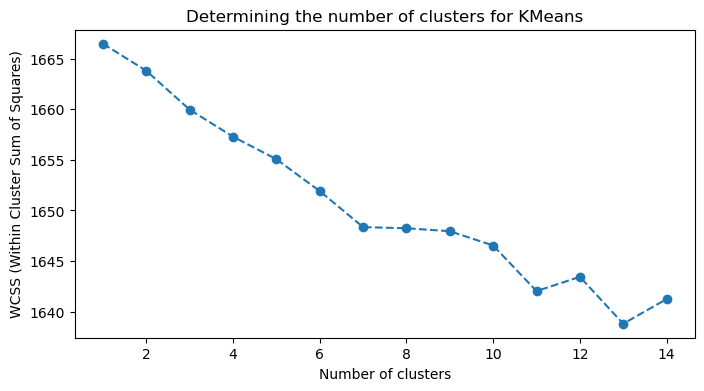

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#pca = PCA(n_components= 2)
#pca_results = pca.fit_transform(scaled_data)

num_clusters = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(movieDescTokensVec)
    num_clusters.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 15), num_clusters, linestyle = '--', marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Determining the number of clusters for KMeans')
plt.show()

I'll try with 3 clusters based on the plot above.

In [147]:
print(len(pca_results[:, 1]))

1679


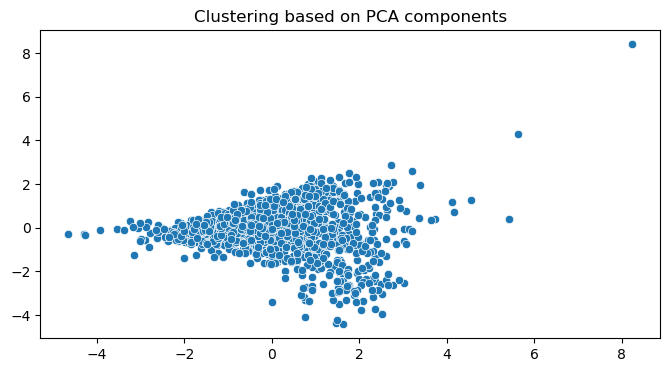

In [148]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1])
plt.title('Clustering based on PCA components')
plt.show()

## Exploratorive analysis

<Figure size 800x400 with 0 Axes>

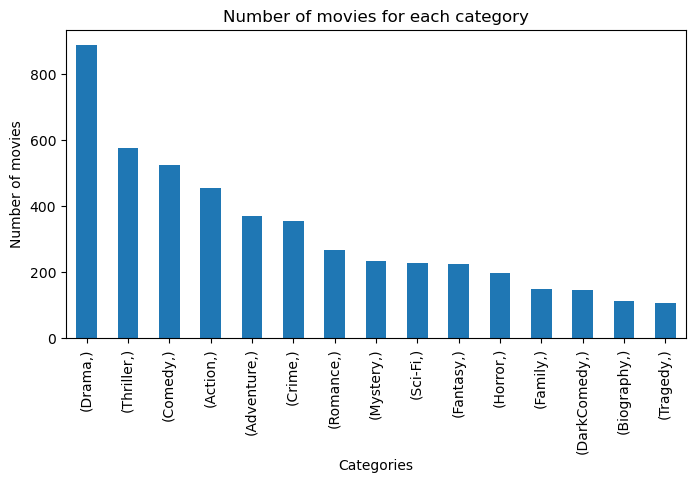

In [206]:
# testing...
plt.figure(figsize=(8, 4))
genres = pd.DataFrame(df['Genre'])

g = []
for genre in genres:
    cleaned_genre = genre.replace('[', '').replace(']', '').replace('\"', '').replace(' ', '').replace('\'', '')
    genre = cleaned_genre.split(',')
    g.append(cleaned_genre.split(','))


new_df = genres.explode('Genre')
categories = new_df.value_counts()
categories = categories[categories > 99]

plt.figure(figsize=(8, 4))
categories.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of movies')
plt.title('Number of movies for each category')
plt.show()


In [215]:
df['Genre']

0                       ['Epic', 'Prison Drama', 'Drama']
1       ['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']
2       ['Dark Comedy', 'Drug Crime', 'Gangster', 'Cri...
3       ['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']
4       ['Action Epic', 'Adventure Epic', 'Psychologic...
                              ...                        
1676               ['Steamy Romance', 'Drama', 'Romance']
1677                       ['Comedy', 'Drama', 'Romance']
1678    ['Feel-Good Romance', 'Jukebox Musical', 'Pop ...
1679    ['Psychological Horror', 'Slasher Horror', 'Ho...
1680    ['Psychological Drama', 'Psychological Thrille...
Name: Genre, Length: 1679, dtype: object

In [235]:
cv = CountVectorizer()
wordCount = cv.fit_transform(df['Genre'])
print(wordCount.shape)

tfidfVector = TfidfTransformer(use_idf=True)
matrix = tfidfVector.fit(wordCount)

df_matrix = pd.DataFrame(matrix.idf_, index=cv.get_feature_names_out(), columns=['Weights'])
df_matrix.sort_values(by=['Weights'])

(1679, 161)


,Weights
drama,1.619720
thriller,2.065247
comedy,2.068707
action,2.297499
adventure,2.475907
...,...
mockumentary,7.327937
extreme,7.733402
samurai,7.733402
concert,7.733402


In [241]:
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df['Genre'])

tfidf.get_feature_names_out()
tfidf_matrix = tfidf_matrix.astype(np.float32)

cos_matrix = cosine_similarity(tfidf_matrix,  tfidf_matrix)
cos_matrix_df = pd.DataFrame(cos_matrix)
cos_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678
0,1.000000,0.299598,0.071898,0.299598,0.300495,0.314538,0.304110,0.349497,0.145720,0.117352,...,0.000000,0.000000,0.000000,0.130399,0.000000,0.087184,0.188873,0.000000,0.000000,0.169749
1,0.299598,1.000000,0.513926,1.000000,0.281901,0.381933,0.285292,0.305925,0.136703,0.100681,...,0.212043,0.000000,0.000000,0.061165,0.128291,0.040895,0.088593,0.000000,0.000000,0.079622
2,0.071898,0.513926,1.000000,0.513926,0.000000,0.014962,0.000000,0.016625,0.000000,0.110843,...,0.321267,0.000000,0.000000,0.046336,0.194375,0.030980,0.176593,0.043012,0.000000,0.060318
3,0.299598,1.000000,0.513926,1.000000,0.281901,0.381933,0.285292,0.305925,0.136703,0.100681,...,0.212043,0.000000,0.000000,0.061165,0.128291,0.040895,0.088593,0.000000,0.000000,0.079622
4,0.300495,0.281901,0.000000,0.281901,1.000000,0.549587,0.775535,0.560483,0.573542,0.097864,...,0.303532,0.325624,0.325624,0.326233,0.275113,0.000000,0.000000,0.000000,0.066407,0.297985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0.087184,0.040895,0.030980,0.040895,0.000000,0.018143,0.000000,0.020159,0.000000,0.050565,...,0.000000,0.000000,0.000000,0.056187,0.000000,1.000000,0.576312,0.194446,0.000000,0.073142
1675,0.188873,0.088593,0.176593,0.088593,0.000000,0.039304,0.000000,0.043673,0.000000,0.109543,...,0.000000,0.000000,0.000000,0.121722,0.000000,0.576312,1.000000,0.323610,0.000000,0.158453
1676,0.000000,0.000000,0.043012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.194446,0.323610,1.000000,0.000000,0.000000
1677,0.000000,0.000000,0.000000,0.000000,0.066407,0.000000,0.000000,0.000000,0.000000,0.055931,...,0.000000,0.000000,0.000000,0.186449,0.157233,0.000000,0.000000,0.000000,1.000000,0.242712
